In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

PR = .9
SE = .75
SP = .95

In [2]:
def Fagan2(data=None, rule=None, plotrule=False, post=False, postrule=False):
    
    Pmax = .999
    Pmin = .001
    Omax = np.ceil(np.log(Pmax/(1-Pmax)))
    Omin = np.floor(np.log(Pmin/(1-Pmin)))
    
    Lticks = [10 ** int(i) for i in np.arange(-3, 3.1, 1)]
    
    Pticks = np.sort(np.concatenate([
        np.arange(.1, .999, .1),
        np.arange(.08, 0, -.02),
        np.arange(.01, 0, -.002),
        np.arange(.92, .999, +.02),
        np.arange(.99, .999, +.002),
        [.001, .999],
        [.85, .15], [.03, .015], [.97, .985],
        [.003, .997]
    ]))
    Oticks = Pticks / (1 - Pticks)
    Pminors = np.concatenate([
        np.arange(.2, .985, .05),
        [.125, .175, .09, .07, .05, .035, .025, .0125, .0175, .009, .007, .005, .0035, .0025, .0015],
        [.825, .875, .91, .93, .95, .965, .975, .9825, .9875, .991, .993, .995, .9965, .9975, .9985]
    ])

    fig, ax = plt.subplots(figsize=(12,12), dpi=250)
    ax.set_xlim(-1.15, 1.15)
    ax.set_ylim(Omin-.05, Omax+.05)

    ax.axvline(-1, c="k")
    ax.scatter([-1 for _ in range(len(Pticks))], np.log(Oticks), marker="_", c="k", s=300)
    for Otick, Ptick in zip(Oticks, Pticks):
        ax.text(
            -1.05, np.log(Otick),
            f"${Ptick:.0%}$" if Ptick<=.98 and Ptick>=.02 else f"${Ptick:.1%}$",
            fontsize=10, va="center", ha="right"
        )
    ax.scatter([-1 for _ in range(len(Pminors))], np.log(Pminors/(1-Pminors)), marker="_", c="k", s=75)

    ax.axvline(+1, c="k")
    ax.scatter([+1 for _ in range(len(Pticks))], np.log(1/Oticks), marker="_", c="k", s=300)
    for Otick, Ptick in zip(Oticks, Pticks):
        ax.text(
            +1.05, np.log(Otick),
            f"${1-Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${1-Ptick:.1%}$",
            fontsize=10, va="center", ha="left"
        )
    ax.scatter([+1 for _ in range(len(Pminors))], np.log(1/(Pminors/(1-Pminors))), marker="_", c="k", s=75)

    Ops = []
    for Ltick in Lticks:
        Op = 1 / (np.sqrt(Ltick) + 1)
        Ops.append(Op)
        ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k", s=200)
        ax.text(+.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=10, c="k", va="center", ha="left")
        ax.text(-.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=10, c="k", va="center", ha="right")
        minors = [Ltick-10**int(np.log10(Ltick)-1)*i for i in range(9)]
        for minor in minors:
            if minor < .001:
                continue
            Op = 1 / (np.sqrt(minor) + 1)
            ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k", s=50)
    ax.plot([0,0], [np.log(Ops[0]/(1-Ops[0])), np.log(Ops[-1]/(1-Ops[-1]))], c="k", ls="-")

    SEmin = np.log(Ops[0]/(1-Ops[0]))
    SEmax = np.log(Ops[-1]/(1-Ops[-1]))

    SEticks = np.sort(
        np.concatenate([
            np.arange(0, 1, .1)[1:],
            np.arange(0, .1, .01)[1:],
            np.arange(0, .01, .001)[1:],
            [.999],
            [.00115, .0013, .0015, .0017],
            [.0023, .0026],
            [.0115, .013, .015, .017],
            [.023, .026],
            [.115, .13, .15, .17],
            [.23, .26],
            [.0035, .035, .35],
            [.0045, .045, .45]
        ])
    )
    ax.plot([-.5,-.5], [SEmin, SEmax], c="k", ls="-")
    for SEtick in SEticks:
        ax.scatter(-.5, SEmax-np.log(SEtick), marker="_", c="k", s=75)
        ax.text(-.525, SEmax-np.log(SEtick), f"${SEtick*100:.2f}$", fontsize=5, va="center", ha="right", c="k")
        ax.text(-.475, SEmax-np.log(SEtick), f"${100-SEtick*100:.2f}$", fontsize=5, va="center", ha="left", c="k")
        # 2nd OR
        ax.text(-.610, SEmax-np.log(SEtick), f"${(1-np.sqrt(1-SEtick))*100:.2f}$", fontsize=5, va="center", ha="right", c="k")
        ax.text(-.390, SEmax-np.log(SEtick), f"${(1-np.sqrt(1-(1-SEtick)))*100:.2f}$", fontsize=5, va="center", ha="left", c="k")
        # 2nd AND
        ax.text(-.690, SEmax-np.log(SEtick), f"${np.sqrt(SEtick)*100:.2f}$", fontsize=5, va="center", ha="right", c="k")
        ax.text(-.310, SEmax-np.log(SEtick), f"${np.sqrt(1-SEtick)*100:.2f}$", fontsize=5, va="center", ha="left", c="k")

    ax.plot([.5,.5], [SEmin, SEmax], c="k", ls="-")
    for SEtick in SEticks:
        ax.scatter(.5, SEmin+np.log(SEtick), marker="_", c="k", s=75)
        ax.text(.525, SEmin+np.log(SEtick), f"${SEtick*100:.2f}$", fontsize=5, va="center", ha="left", c="k")
        ax.text(.475, SEmin+np.log(SEtick), f"${100-SEtick*100:.2f}$", fontsize=5, va="center", ha="right", c="k")
        # 2nd OR
        ax.text(.610, SEmin+np.log(SEtick), f"${np.sqrt(SEtick)*100:.2f}$", fontsize=5, va="center", ha="left", c="k")
        ax.text(.390, SEmin+np.log(SEtick), f"${np.sqrt(1-SEtick)*100:.2f}$", fontsize=5, va="center", ha="right", c="k")
        # 2nd AND
        ax.text(.690, SEmin+np.log(SEtick), f"${(1-np.sqrt(1-SEtick))*100:.2f}$", fontsize=5, va="center", ha="left", c="k")
        ax.text(.310, SEmin+np.log(SEtick), f"${(1-np.sqrt(1-(1-SEtick)))*100:.2f}$", fontsize=5, va="center", ha="right", c="k")

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Fagan's Nomogram", fontsize=20)
    ax.text(-1.2, 0, "Prior Disease Probability %", ha="center", va="center", fontsize=20, rotation=90)
    ax.text(+1.2, 0, "Posterior Disease Probability %", ha="center", va="center", fontsize=20, rotation=270)
    ax.text(0, SEmin+.5, "$\mathbf{LR}$", ha="center", va="center", fontsize=20)
    ax.text(-.5, SEmin+.5, "SENSITIVITY", ha="center", va="center", fontsize=20)

    ax.text(-.525, SEmin+.2, "$\oplus$", ha="right", va="center", fontsize=12, color="k")
    ax.text(-.600, SEmin+.2, r"OR", ha="right", va="center", fontsize=10, color="k")
    ax.text(-.680, SEmin+.2, r"AND", ha="right", va="center", fontsize=10, color="k")
    ax.text(-.475, SEmin+.2, "$\ominus$", ha="left", va="center", fontsize=12, color="k")
    ax.text(-.400, SEmin+.2, r"OR", ha="left", va="center", fontsize=10, color="k")
    ax.text(-.320, SEmin+.2, r"AND", ha="left", va="center", fontsize=10, color="k")

    ax.text(+.5, SEmin+.5, "SPECIFICITY", ha="center", va="center", fontsize=20)
    ax.text(+.475, SEmin+.2, "$\oplus$", ha="right", va="center", fontsize=12, color="k")
    ax.text(+.400, SEmin+.2, r"OR", ha="right", va="center", fontsize=10, color="k")
    ax.text(+.320, SEmin+.2, r"AND", ha="right", va="center", fontsize=10, color="k")
    ax.text(+.525, SEmin+.2, "$\ominus$", ha="left", va="center", fontsize=12, color="k")
    ax.text(+.600, SEmin+.2, r"OR", ha="left", va="center", fontsize=10, color="k")
    ax.text(+.680, SEmin+.2, r"AND", ha="left", va="center", fontsize=10, color="k")

    ax.text(0, Omin, "Coded by Max Pierini - 2020", ha="center")
    
    if data:
        # draw data
        data = np.array(data)
        data[data<=0] = 1e-3
        data[data>=1] = 1 - 1e-3
        PR = data[0]
        SE = data[1]
        SP = data[2]

        # SE,SP->LR
        ax.plot(
            [-.5, .5],
            [SEmax-np.log(SE), SEmin+np.log(1-SP)],
            c="b", alpha=.25, ls="-"
        )
        ax.arrow(-.574, SEmax-np.log(SE), .075, 0, color="b", 
                 length_includes_head=True, head_width=.2, head_length=.02, zorder=100)
        ax.arrow(+.425, SEmin+np.log(1-SP), .075, 0, color="b", 
                 length_includes_head=True, head_width=.2, head_length=.02, zorder=100)
        LRp = SE / (1 - SP)
        LRpO = 1 / (np.sqrt(LRp) + 1)
        ax.scatter(0, np.log(LRpO/(1-LRpO)), c="b")
        ax.plot(
            [-.5, .5],
            [SEmax-np.log(1-SE), SEmin+np.log(SP)],
            c="b", alpha=.25, ls="--"
        )
        ax.arrow(-.425, SEmax-np.log(1-SE), -.075, 0, color="b", 
                 length_includes_head=True, head_width=.2, head_length=.02, zorder=100)
        ax.arrow(+.575, SEmin+np.log(SP), -.075, 0, color="b", 
                 length_includes_head=True, head_width=.2, head_length=.02, zorder=100)
        LRn = (1 - SE) / SP
        LRnO = 1 / (np.sqrt(LRn) + 1)
        ax.scatter(0, np.log(LRnO/(1-LRnO)), c="b")
        print(f"""
        Pr: {PR:>7.2%}  
        SE1:{SE:>7.2%}
        SP1:{SP:>7.2%}
        LR(+):{LRp:>7.2f}
        LR(-):{LRn:>7.2f}
        """)
        if post:
            OPp = LRp * (PR/(1-PR))
            PPp = OPp/(1+OPp)
            # Pr,LR->Po
            ax.plot(
                [-1, 1], [np.log(PR/(1-PR)), np.log((1-PR)/(PR*LRp))],
                c="b", alpha=.75, ls="-"
            )
            OPn = LRn * (PR/(1-PR))
            PPn = OPn/(1+OPn)
            ax.plot(
                [-1, 1], [np.log(PR/(1-PR)), np.log((1-PR)/(PR*LRn))],
                c="b", alpha=.75, ls="--"
            )
            print(f"""
            Po(+):{PPp:>7.2%}
            Po(-):{PPn:>7.2%}
            """)

        if rule:
            if rule == "OR":
                ax.plot([-1, 1], [np.log(PPn/(1-PPn)), np.log((1-PPn)/(PPn*1))], c="k", alpha=.25, ls=":")
                if plotrule:
                    # regola OR #
                    vSE = 1 - (1 - SE) ** 2
                    vSP = SP ** 2
                    # SE,SP->LR
                    ax.plot(
                        [-.5, .5],
                        [SEmax-np.log(vSE), SEmin+np.log(1-vSP)],
                        c="r", alpha=.25, ls="-"
                    )
                    ax.arrow(-.65, SEmax-np.log(vSE), .15, 0, color="r", 
                             length_includes_head=True, head_width=.2, head_length=.02, zorder=100)
                    ax.arrow(+.35, SEmin+np.log(1-vSP), .15, 0, color="r", 
                             length_includes_head=True, head_width=.2, head_length=.02, zorder=100)
                    ax.plot(
                        [-.5, .5],
                        [SEmax-np.log(1-vSE), SEmin+np.log(vSP)],
                        c="r", alpha=.25, ls="--"
                    )
                    ax.arrow(-.35, SEmax-np.log(1-vSE), -.15, 0, color="r", 
                             length_includes_head=True, head_width=.2, head_length=.02, zorder=100)
                    ax.arrow(+.65, SEmin+np.log(vSP), -.15, 0, color="r", 
                             length_includes_head=True, head_width=.2, head_length=.02, zorder=100)
                    vLRp = vSE / (1 - vSP)
                    vLRn = (1 - vSE) / vSP
                    vLRpO = 1 / (np.sqrt(vLRp) + 1)
                    ax.scatter(0, np.log(vLRpO/(1-vLRpO)), c="r")
                    vLRnO = 1 / (np.sqrt(vLRn) + 1)
                    ax.scatter(0, np.log(vLRnO/(1-vLRnO)), c="r")
                    print(f"""
                    # regola OR #
                    SE2:{vSE:>7.2%}
                    SP2:{vSP:>7.2%}  
                    LR(+):{vLRp:>7.2f}
                    LR(-):{vLRn:>7.2f}
                    """)
                    if postrule:
                        # Pr,LR->Po
                        vOPp = vLRp * (PPn/(1-PPn))
                        vPPp = vOPp/(1+vOPp)
                        # SE,SP->LR
                        ax.plot(
                            [-1, 1], [np.log(PPn/(1-PPn)), np.log((1-PPn)/(PPn*vLRp))],
                            c="r", alpha=.75, ls="-"
                        )
                        # Pr,LR->Po
                        vOPn = vLRn * (PPn/(1-PPn))
                        vPPn = vOPn/(1+vOPn)
                        ax.plot(
                            [-1, 1], [np.log(PPn/(1-PPn)), np.log((1-PPn)/(PPn*vLRn))],
                            c="r", alpha=.75, ls="--"
                        )
                        print(f"""
                        Po(+):{vPPp:>7.2%}
                        Po(-):{vPPn:>7.2%}
                        """)

            if rule == "AND":
                ax.plot([-1, 1], [np.log(PPp/(1-PPp)), np.log((1-PPp)/(PPp*1))], c="k", alpha=.25, ls=":")
                if plotrule:
                    # regola AND #
                    aSE = SE ** 2
                    aSP = 1 - (1 - SP) ** 2
                    # SE,SP->LR
                    ax.plot(
                        [-.5, .5],
                        [SEmax-np.log(aSE), SEmin+np.log(1-aSP)],
                        c="y", alpha=.25, ls="-"
                    )
                    ax.plot(
                        [-.5, .5],
                        [SEmax-np.log(1-aSE), SEmin+np.log(aSP)],
                        c="y", alpha=.25, ls="--"
                    )
                    # Pr,LR->Po
                    aLRp = aSE / (1 - aSP)
                    aOPp = aLRp * (PPp/(1-PPp))
                    aPPp = aOPp/(1+aOPp)
                    # SE,SP->LR
                    ax.plot(
                        [-1, 1], [np.log(PPp/(1-PPp)), np.log((1-PPp)/(PPp*aLRp))],
                        c="y", alpha=.5, ls="-"
                    )
                    # Pr,LR->Po
                    aLRn = (1 - aSE) / aSP
                    aOPn = aLRn * (PPp/(1-PPp))
                    aPPn = aOPn/(1+aOPn)
                    ax.plot(
                        [-1, 1], [np.log(PPp/(1-PPp)), np.log((1-PPp)/(PPp*aLRn))],
                        c="y", alpha=.5, ls="--"
                    )
                    print(f"""
                    # regola AND #
                    SE2:{aSE:>7.2%}  SP2:{aSP:>7.2%}  
                    LR(+):{aLRp:>7.2f}  Po(+):{aPPp:>7.2%}
                    LR(-):{aLRn:>7.2f}  Po(-):{aPPn:>7.2%}
                    """)

    plt.show();

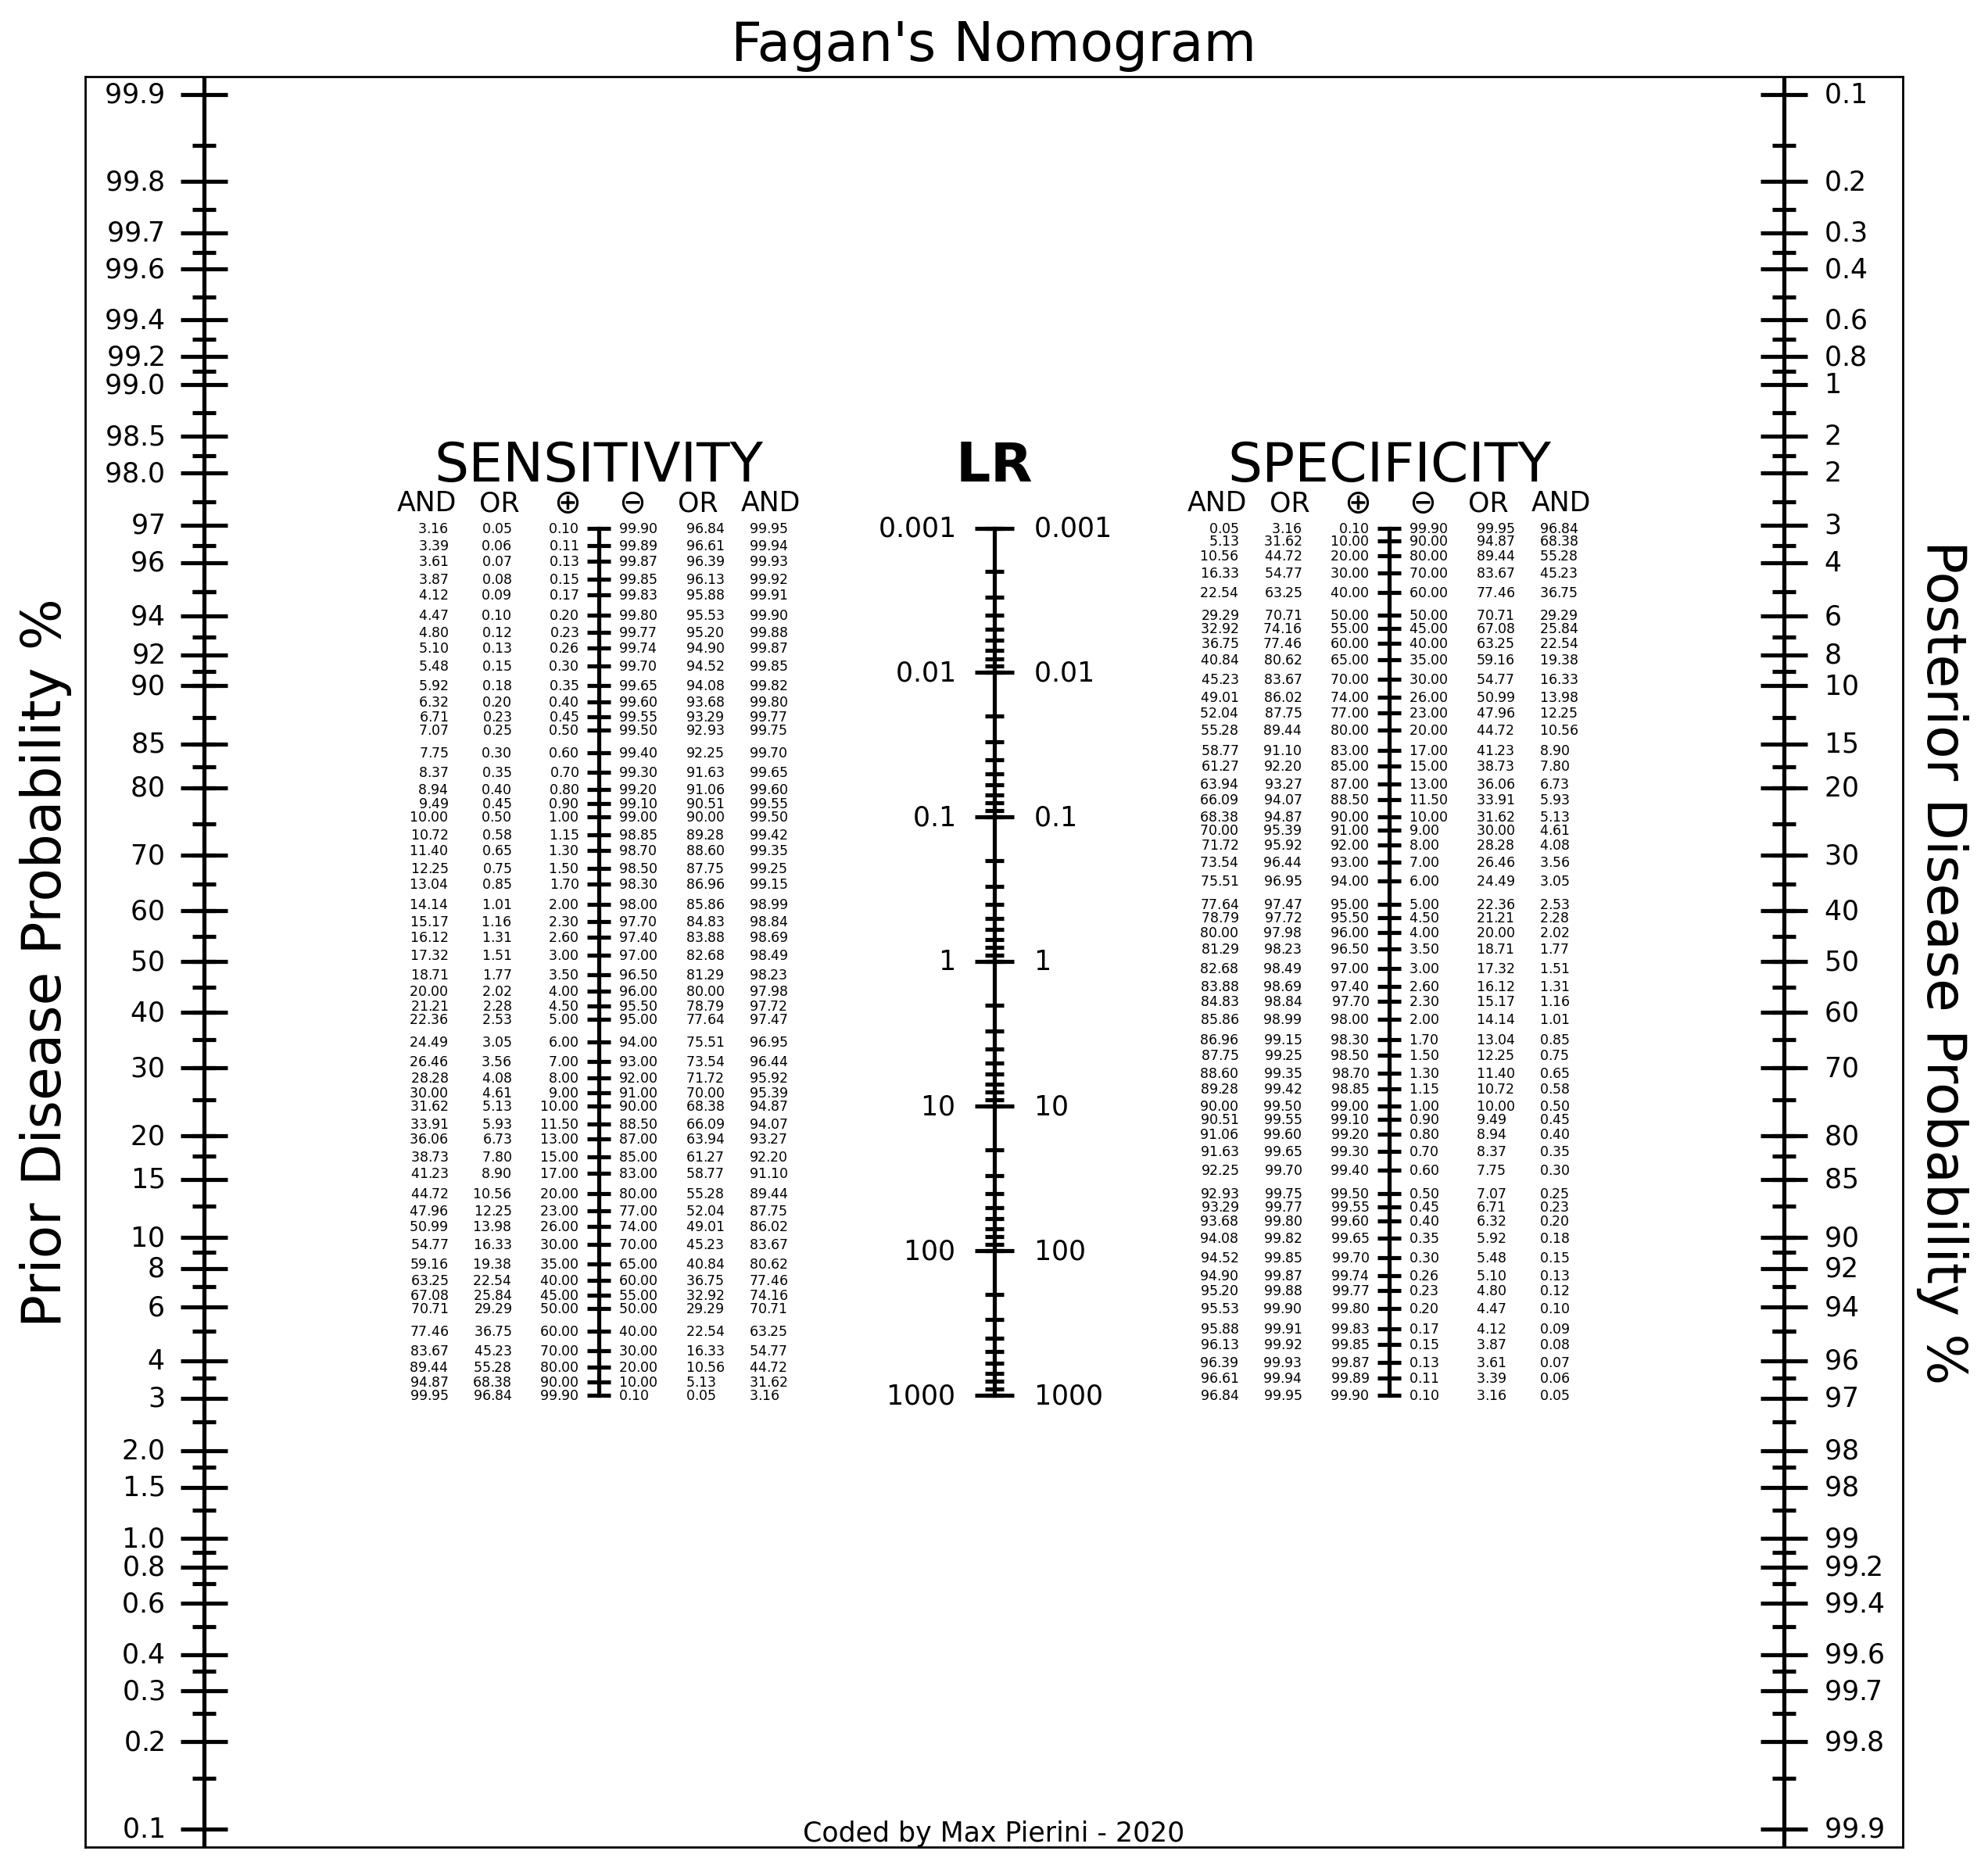

In [3]:
Fagan2()

Il nomogramma di Fagan semplifica l'interpretazione delle Likelihood Ratios di un test, segno o sintomo, data la probabilità di malattia priori, indicando la risultante probabilità di malattia a posteriori <cite data-cite="franco2016rapporto"></cite> <cite data-cite="caraguel2013two"></cite> fornendo uno strumento grafico di facile utilizzo senza la necessità di effettuare calcoli.

Un'estensione nota del nomogramma classico, presenta due ulteriori assi, sensibilità e specificità, tramite i quali si può ottenere il valore delle Likelihood Ratios per risultato positivo e negativo.

Un'ulteriore possibile estensione consiste nell'aggiungere agli assi di sensibilità e specificità anche i valori modificati dalle regole di ripetizione di un test **OR** (ripetuto se negativo) a **AND** (ripetuto se positivo).

Vediamo un esempio di utilizzo.

In [4]:
display(Markdown(f"""
Supponiamo che un paziente con probabilità di malattia a priori del {PR:.0%} debba essere
sottoposto ad un test con sensibilità {SE:.0%} e specificità {SP:.0%}.

Data la nota sensibilità non ottimale, il test verrà ripetuto due volte con regola **OR**:

- sarà ripetuto solo negativo
- solo entrambi i risultati negativi potranno escludere la patologia
- ne basterà uno solo positivo per diagnosticare la malattia

La ripetizione del test modificherà sensibilità e specificità in base alle note formule.

Iniziamo tracciando le prime due linee tra specificità e sensibilità per ottenere le
Likelihood Ratios. Cerchiamo

- il valore della dichiarata sensibilità sull'asse corrispondente nella colonna del risultato positivo $\oplus$
- il valore della dichiarata specificità sull'asse corrispondente nella colonna del risultato positivo $\oplus$

e tracciamo una linea (blu chiaro intera). 
L'intercetta con l'asse $\mathbf{{LR}}$ corrisponderà alla Likelihood Ratio per risultato positivo.

Cerchiamo ora

- il valore della dichiarata sensibilità sull'asse corrispondente nella colonna del risultato negativo $\ominus$
- il valore della dichiarata specificità sull'asse corrispondente nella colonna del risultato negativo $\ominus$

e tracciamo una linea (blu chiaro tratteggiata). 
L'intercetta con l'asse $\mathbf{{LR}}$ corrisponderà alla Likelihood Ratio per risultato negativo.
"""))


Supponiamo che un paziente con probabilità di malattia a priori del 90% debba essere
sottoposto ad un test con sensibilità 75% e specificità 95%.

Data la nota sensibilità non ottimale, il test verrà ripetuto due volte con regola **OR**:

- sarà ripetuto solo negativo
- solo entrambi i risultati negativi potranno escludere la patologia
- ne basterà uno solo positivo per diagnosticare la malattia

La ripetizione del test modificherà sensibilità e specificità in base alle note formule.

Iniziamo tracciando le prime due linee tra specificità e sensibilità per ottenere le
Likelihood Ratios. Cerchiamo

- il valore della dichiarata sensibilità sull'asse corrispondente nella colonna del risultato positivo $\oplus$
- il valore della dichiarata specificità sull'asse corrispondente nella colonna del risultato positivo $\oplus$

e tracciamo una linea (blu chiaro intera). 
L'intercetta con l'asse $\mathbf{LR}$ corrisponderà alla Likelihood Ratio per risultato positivo.

Cerchiamo ora

- il valore della dichiarata sensibilità sull'asse corrispondente nella colonna del risultato negativo $\ominus$
- il valore della dichiarata specificità sull'asse corrispondente nella colonna del risultato negativo $\ominus$

e tracciamo una linea (blu chiaro tratteggiata). 
L'intercetta con l'asse $\mathbf{LR}$ corrisponderà alla Likelihood Ratio per risultato negativo.



        Pr:  90.00%  
        SE1: 75.00%
        SP1: 95.00%
        LR(+):  15.00
        LR(-):   0.26
        


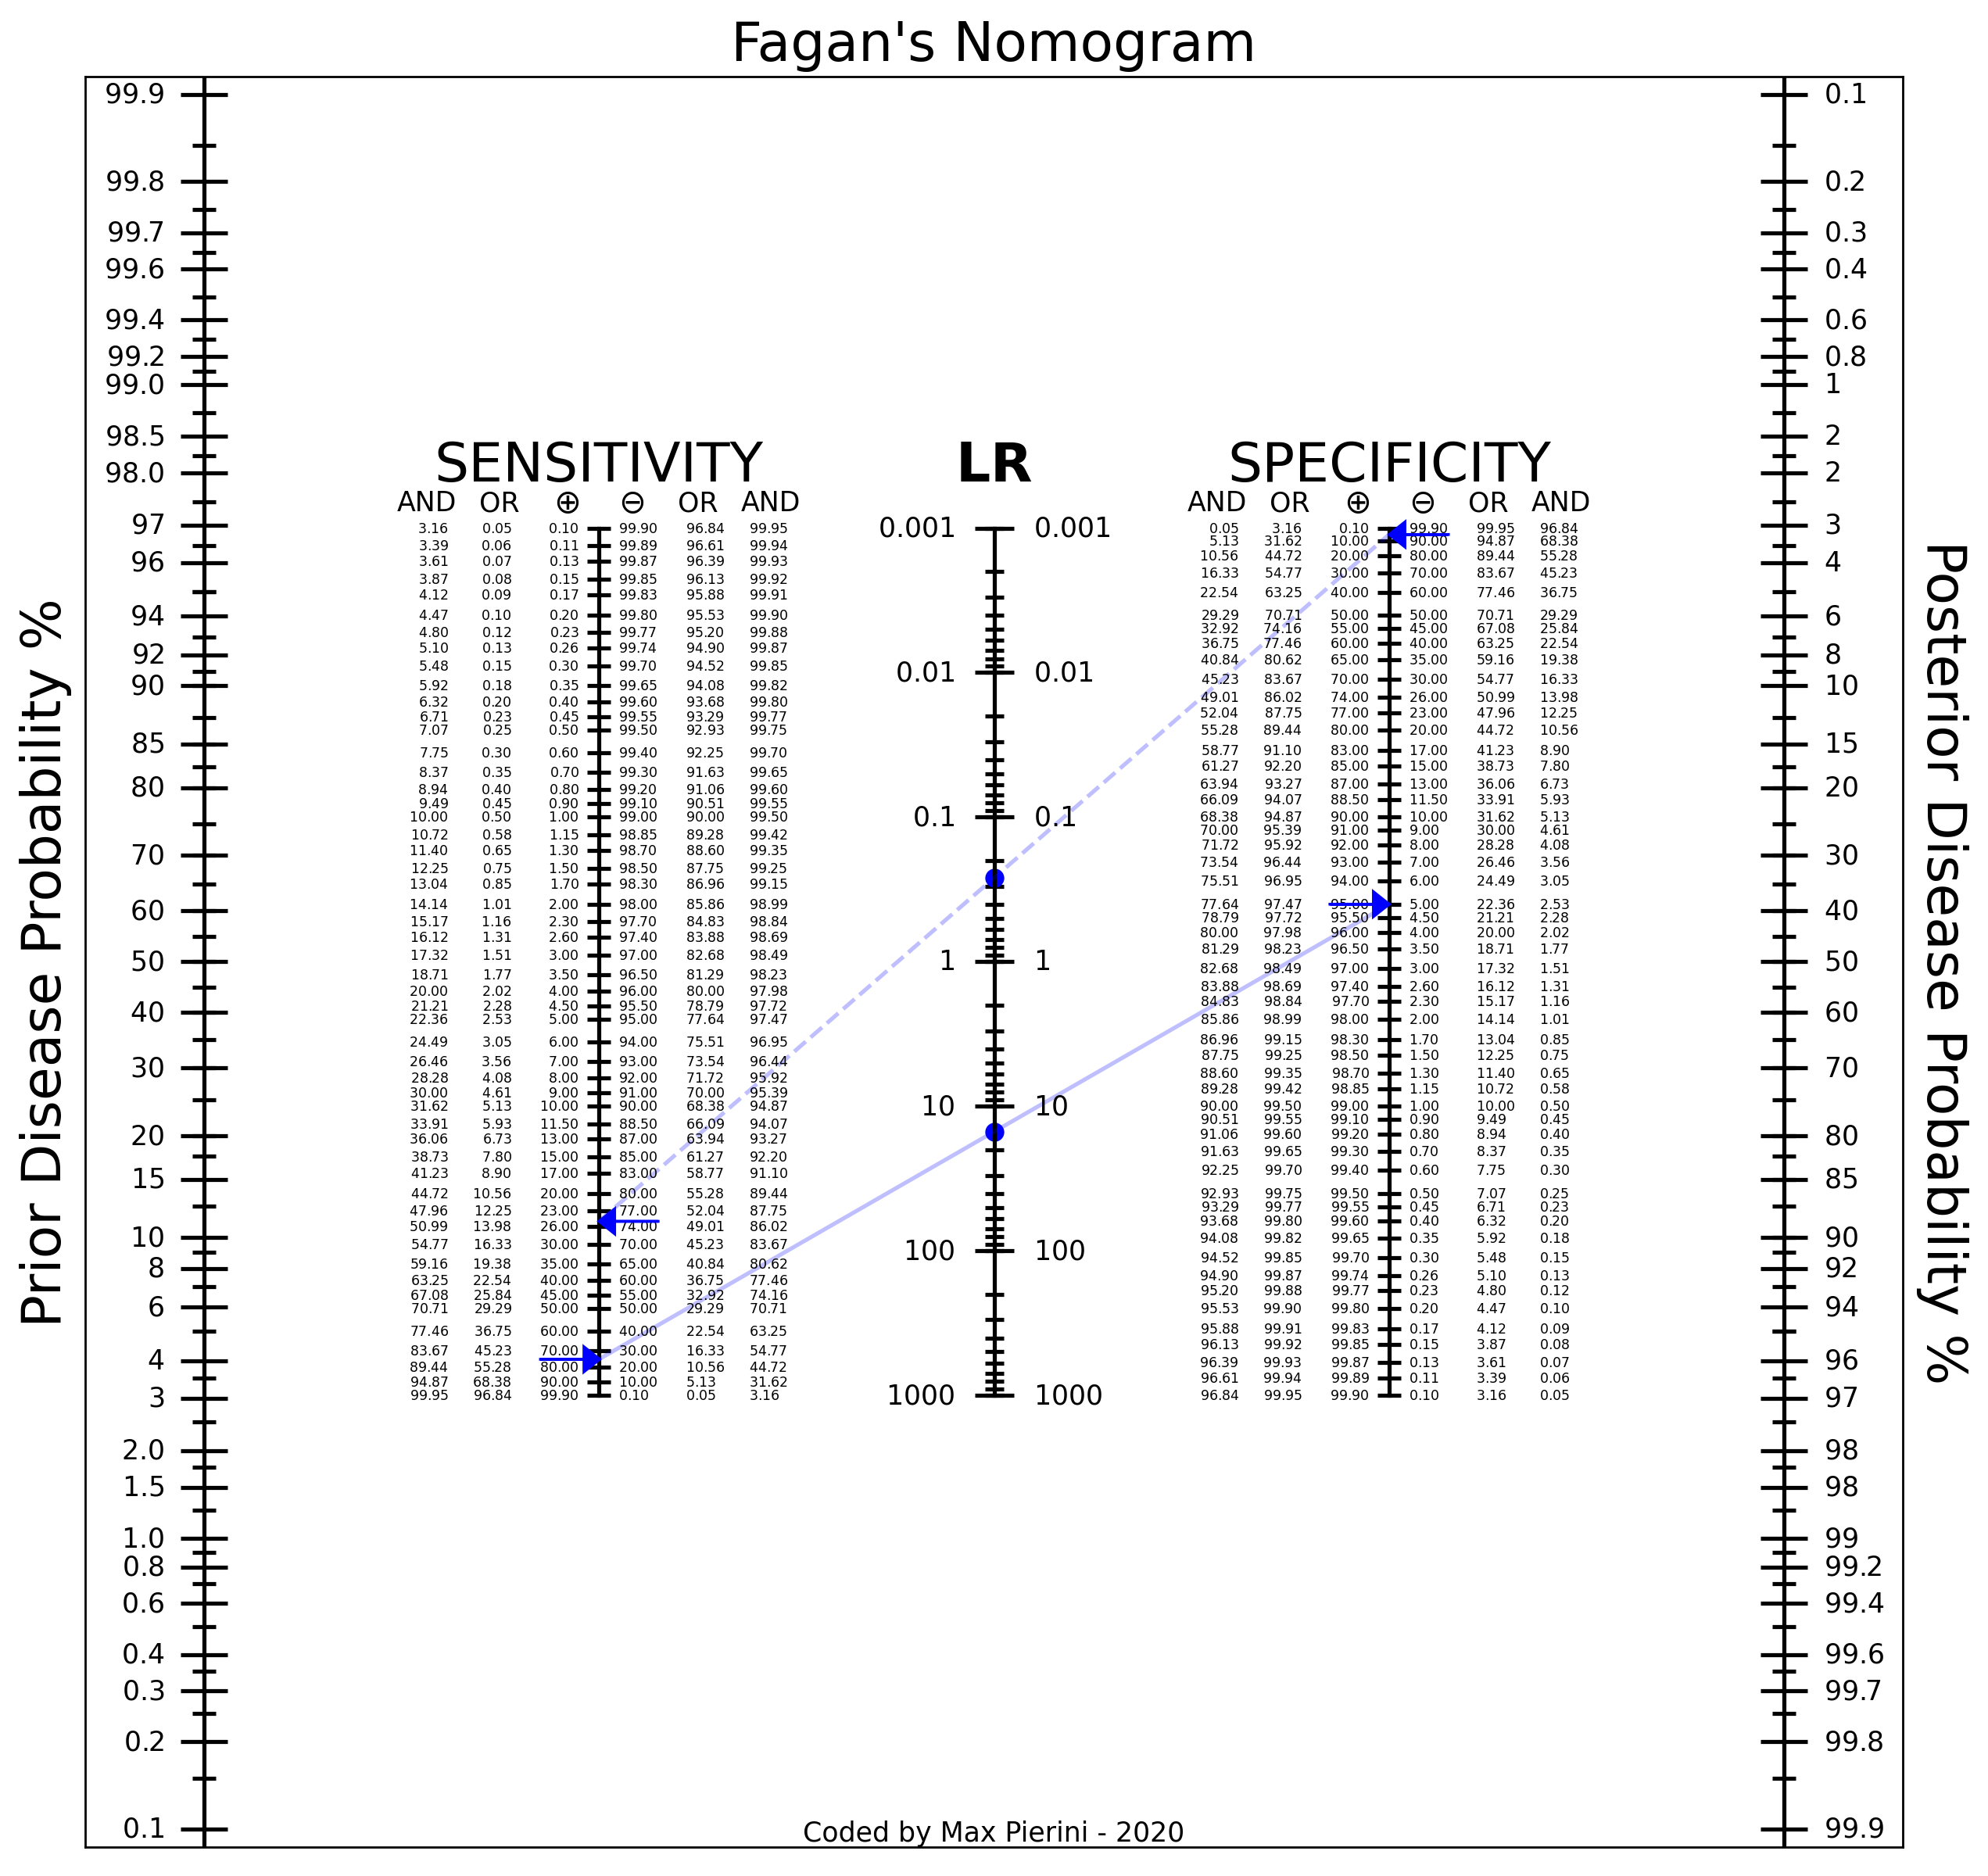

In [5]:
Fagan2(data=[PR, SE, SP], post=False)

Possiamo ora tracciare le due linee dalla probabilità di malattia.

La prima (blu intera) passante per la nota probabilità di malattia a priori e il valore di $\mathbf{LR}$ per risultato positivo, la seconda (blu tratteggiata) passante per la nota probabilità di malattia a priori e il valore di $\mathbf{LR}$ per risultato negativo.

Le intercette sull'asse destro della probabilità a posteriori mostreranno le corrispondenti probabilità a posteriori dato esito rispettivamente positivo e negativo del test.


        Pr:  90.00%  
        SE1: 75.00%
        SP1: 95.00%
        LR(+):  15.00
        LR(-):   0.26
        

            Po(+): 99.26%
            Po(-): 70.31%
            


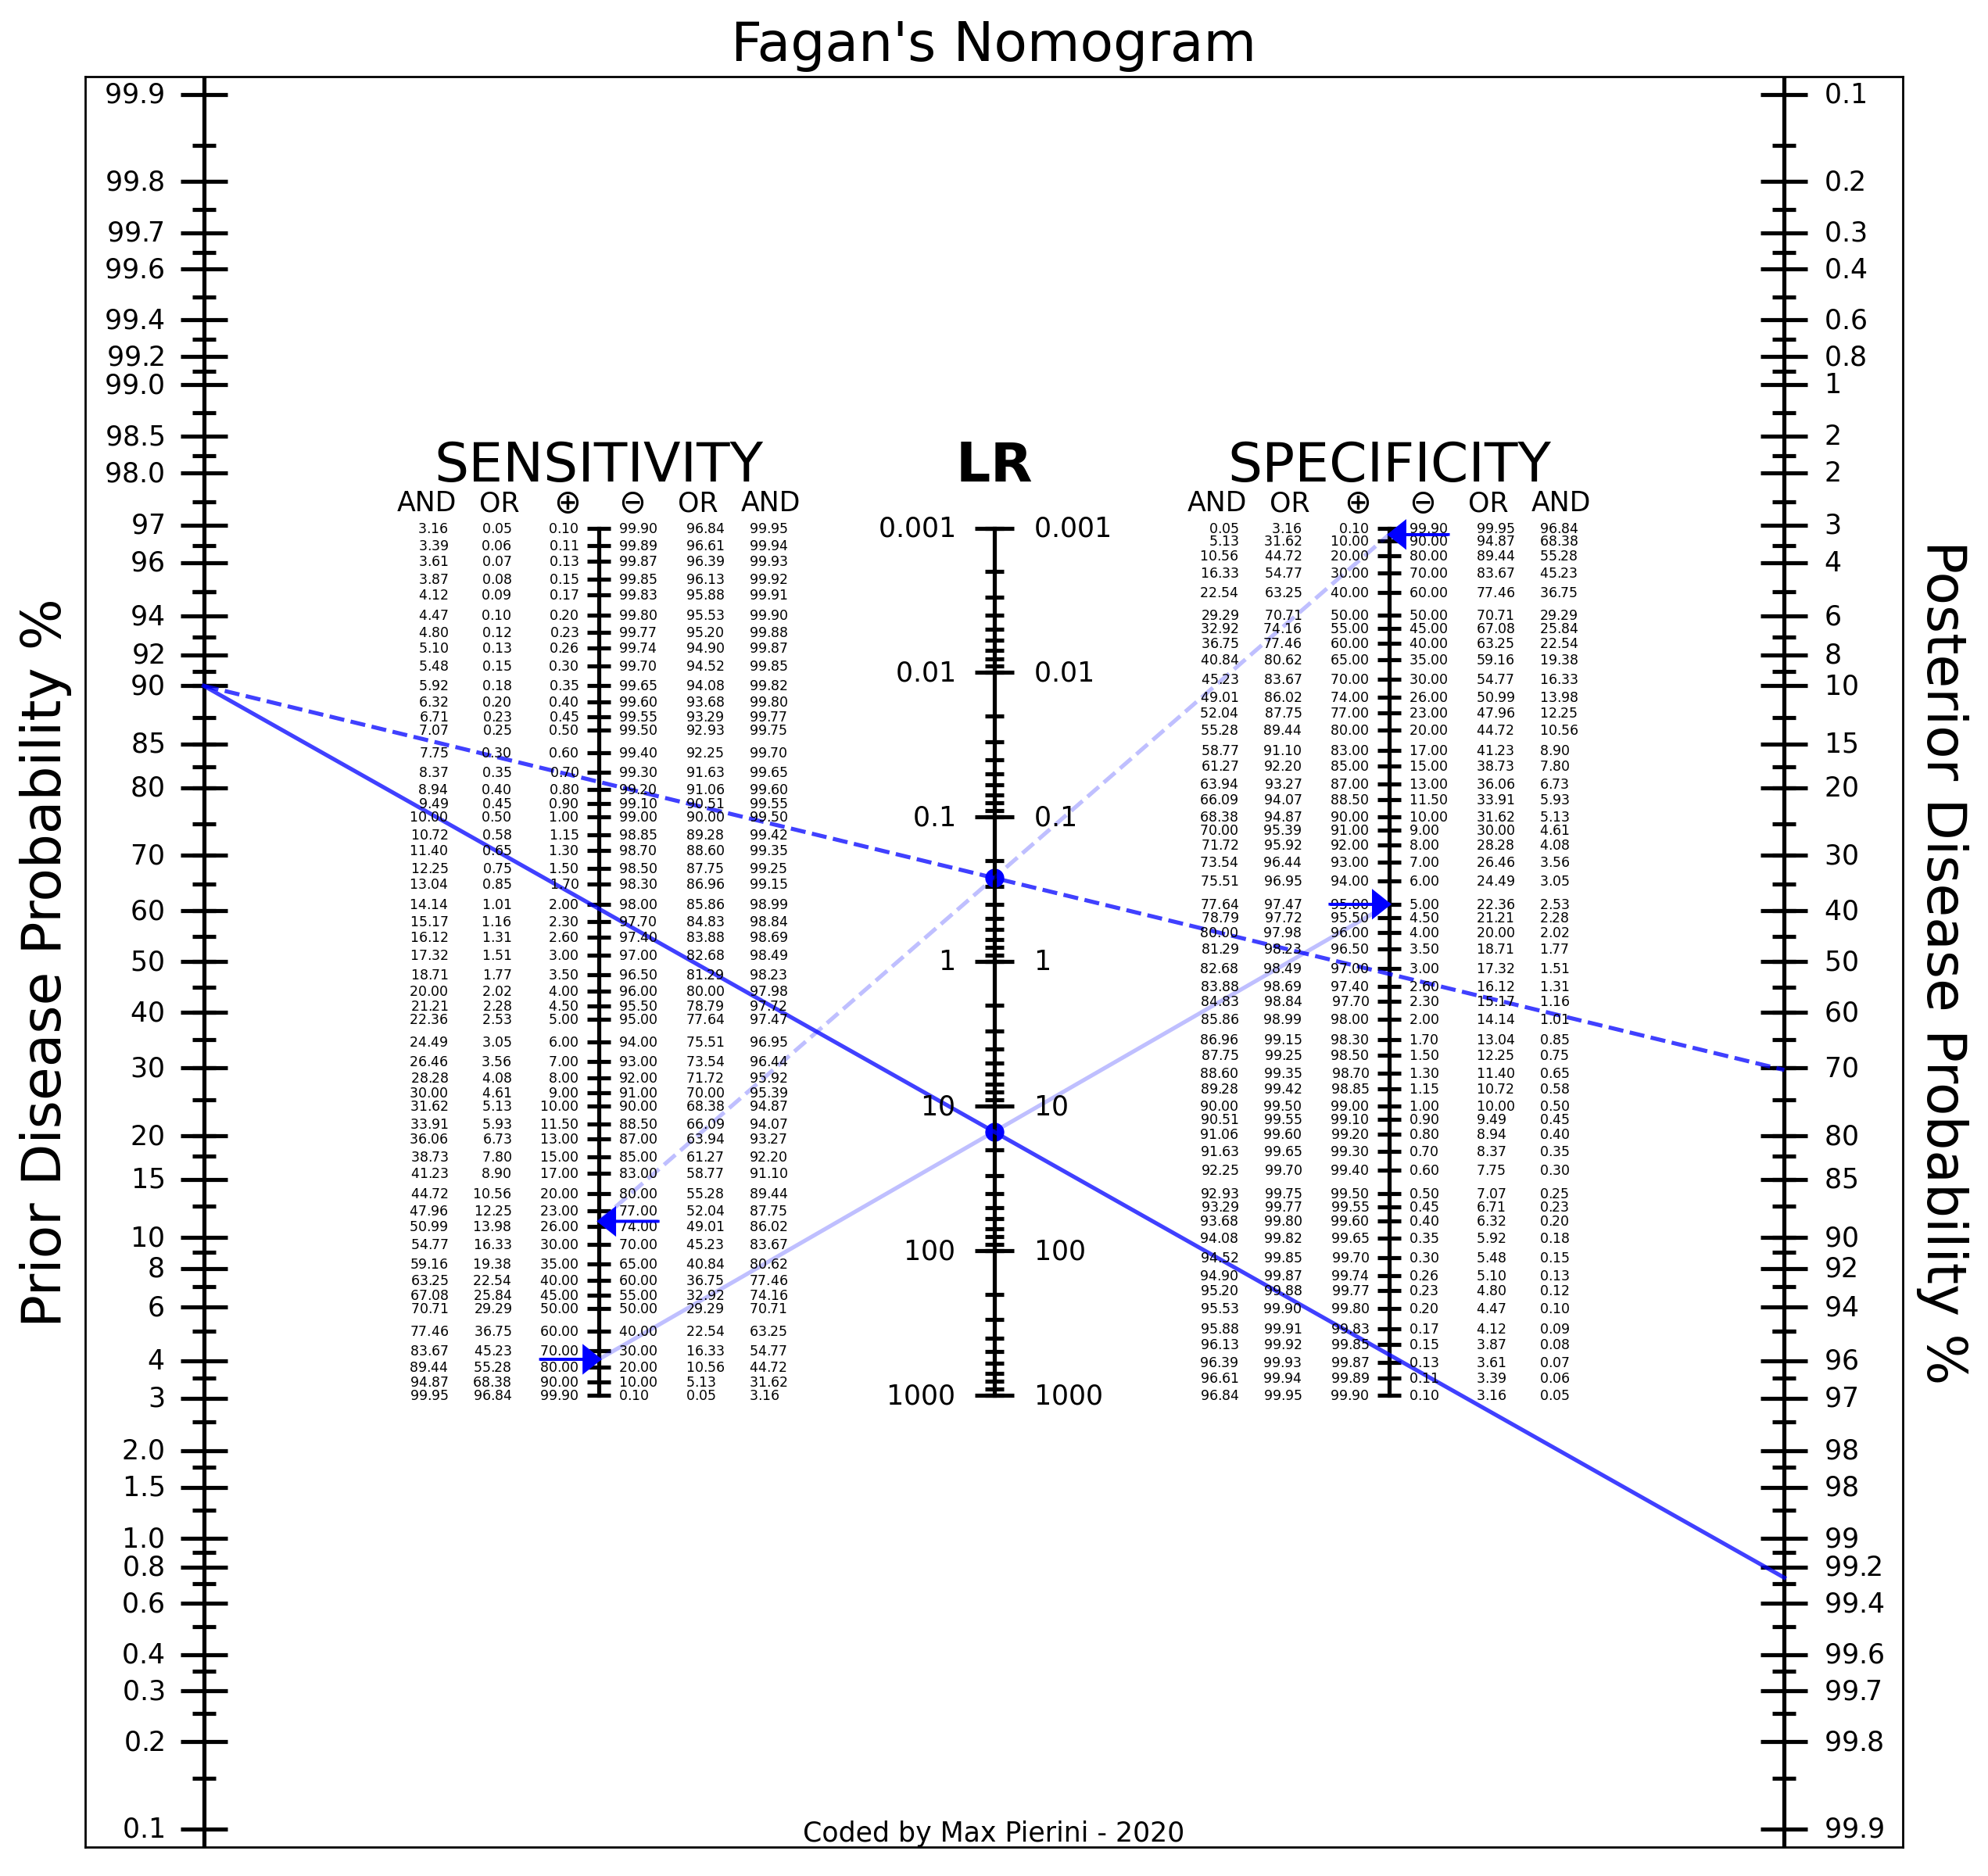

In [6]:
Fagan2(data=[PR, SE, SP], post=True)

In caso fosse positivo, il test non verrà ripetuto. In caso fosse invece negativo dovrà essere ripetuto con la regola **OR** scelta: la probabilità a posteriori per test negativo sarà la nuova probabilità a priori. Tracciamo pertanto una linea dal valore corrispondente alla probabilità a posteriori per test negativo e passante per LR=1: l'intercetta con l'asse sinistro delle probabilità a priori sarà esattamente uguale alla precedente probabilità a posteriori (infatti, $\mathbf{LR}=1$ non influisce sulla ridistribuzione delle probabilità).


        Pr:  90.00%  
        SE1: 75.00%
        SP1: 95.00%
        LR(+):  15.00
        LR(-):   0.26
        

            Po(+): 99.26%
            Po(-): 70.31%
            


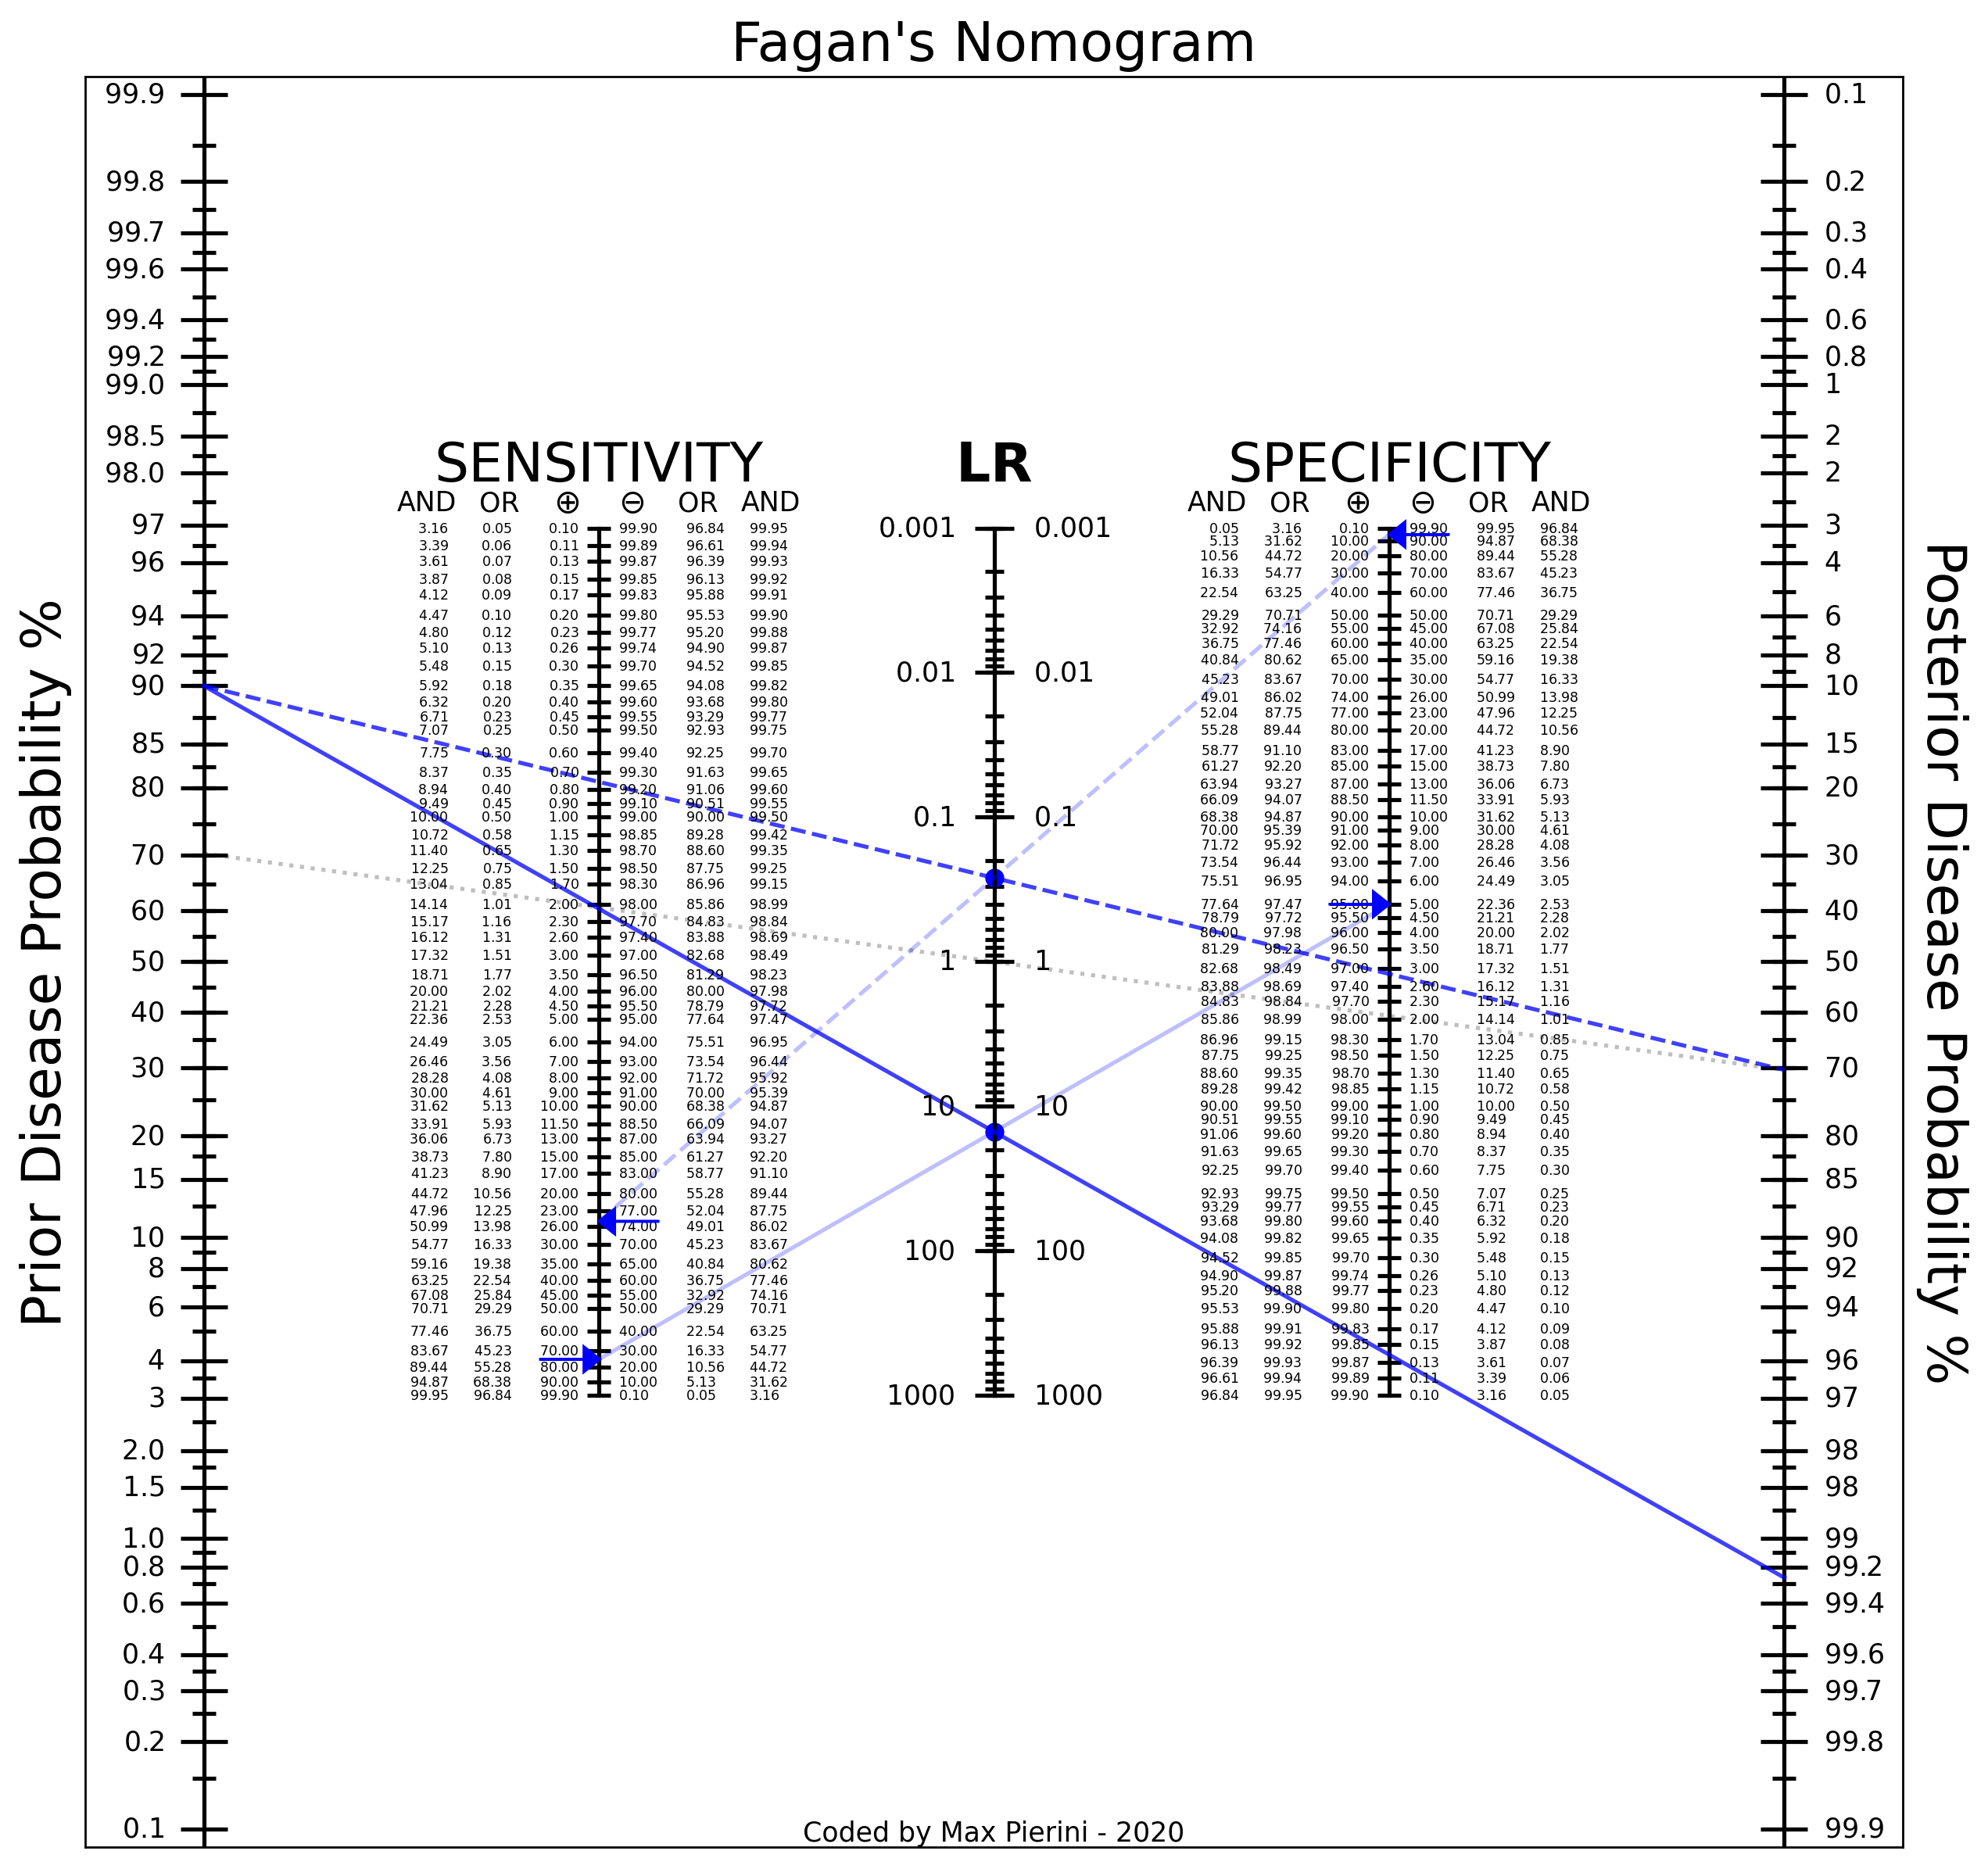

In [7]:
Fagan2(data=[PR, SE, SP], post=True, plotrule=False, rule="OR")

Tracciamo ora le linee delle nuove sensibilità e specificità sugli assi corrispondenti ma, questa volta dato che il test è stato ripetuto, cercando i valori nelle colonne **OR**.

Cerchiamo

- il valore della dichiarata sensibilità sull'asse corrispondente nella colonna **OR** del risultato positivo $\oplus$
- il valore della dichiarata specificità sull'asse corrispondente nella colonna **OR** del risultato positivo $\oplus$

e tracciamo una linea (rosso chiaro intera). I valori di sensibilità e specificità nelle colonne del test positivo indicheranno i valori dei nuovi parametri modificati dalla ripetizione del test.
L'intercetta con l'asse $\mathbf{{LR}}$ corrisponderà alla Likelihood Ratio per risultato positivo dopo ripetizione.

Cerchiamo ora

- il valore della dichiarata sensibilità sull'asse corrispondente nella colonna **OR** del risultato negativo $\ominus$
- il valore della dichiarata specificità sull'asse corrispondente nella colonna **OR** del risultato negativo $\ominus$

e tracciamo una linea (rosso chiaro tratteggiata). I valori di sensibilità e specificità nelle colonne del test negativo indicheranno i valori dei nuovi parametri modificati dalla ripetizione del test.
L'intercetta con l'asse $\mathbf{{LR}}$ corrisponderà alla Likelihood Ratio per risultato negativo dopo ripetizione.


        Pr:  90.00%  
        SE1: 75.00%
        SP1: 95.00%
        LR(+):  15.00
        LR(-):   0.26
        

            Po(+): 99.26%
            Po(-): 70.31%
            

                    # regola OR #
                    SE2: 93.75%
                    SP2: 90.25%  
                    LR(+):   9.62
                    LR(-):   0.07
                    


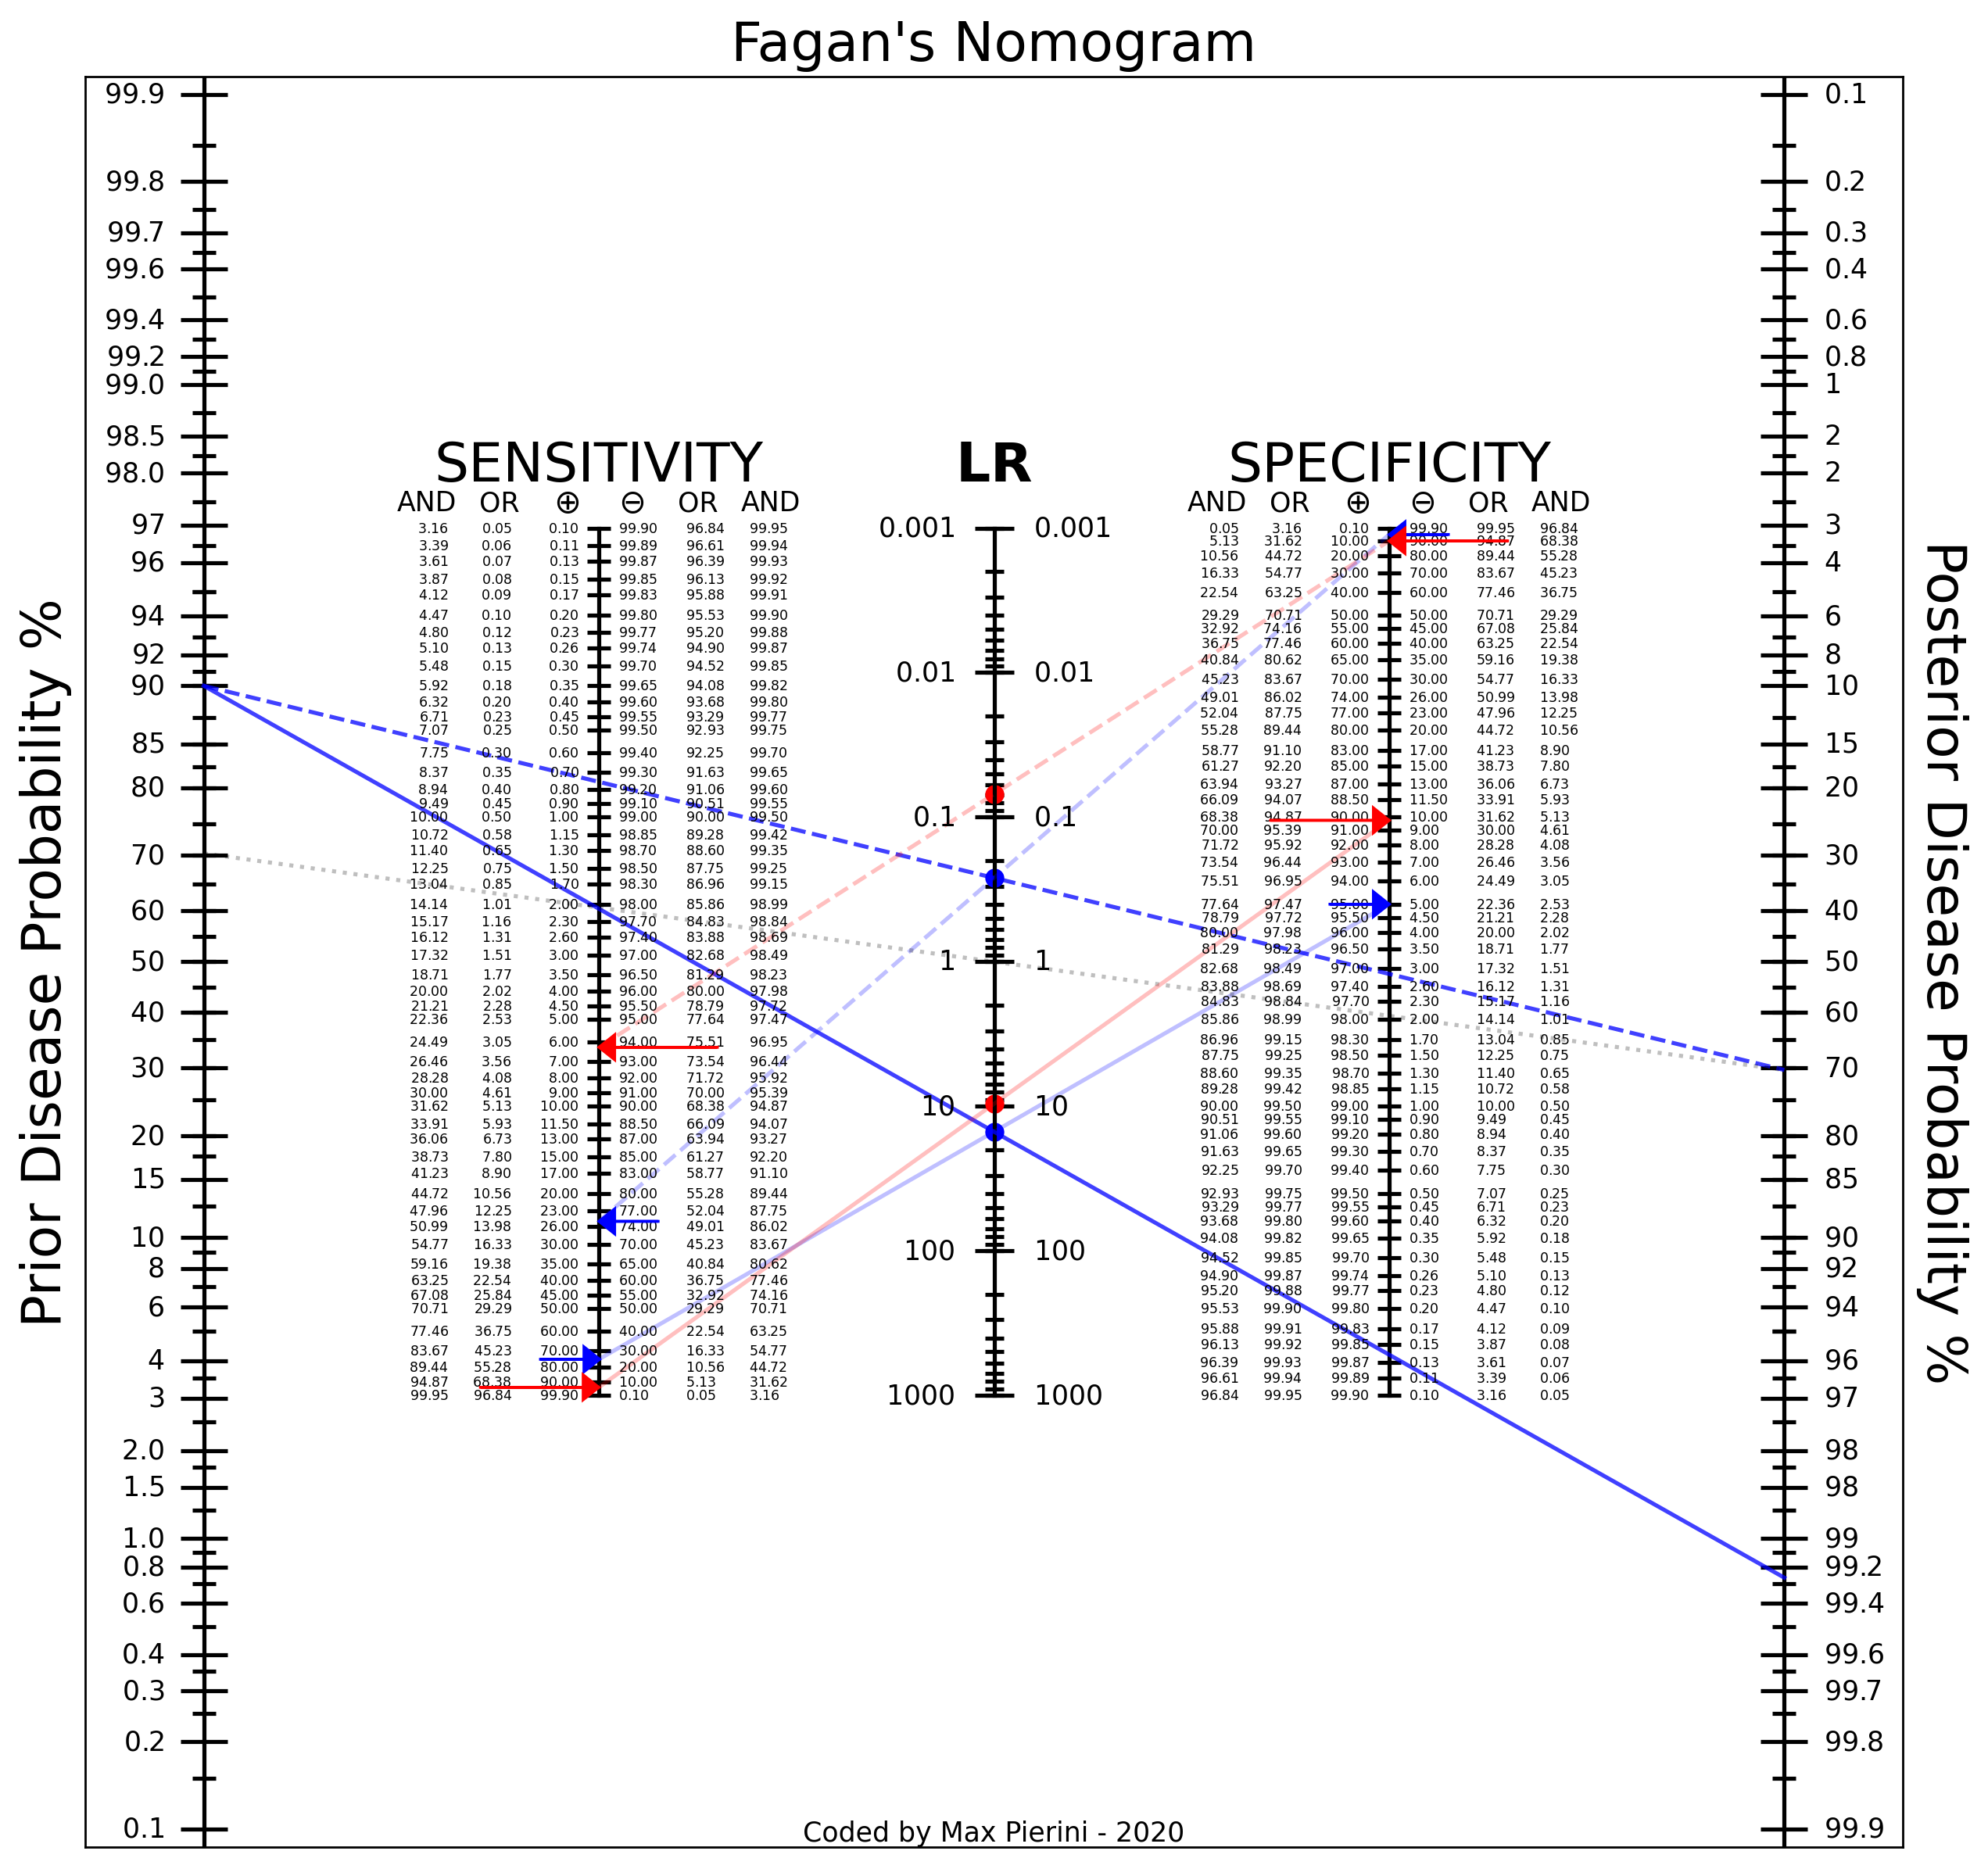

In [8]:
Fagan2(data=[PR, SE, SP], post=True, plotrule=True, rule="OR")

Tracciamo dunque le ultime linee dalla nuova probabilità a posteriori.

La prima (rossa intera) passante per la nuova probabilità di malattia a priori e il valore di $\mathbf{LR}$ per risultato positivo dopo ripetizione, la seconda (rossa tratteggiata) passante per la nuova probabilità di malattia a priori e il valore di $\mathbf{LR}$ per risultato negativo dopo ripetizione.

Le intercette sull'asse destro della probabilità a posteriori mostreranno le corrispondenti probabilità a posteriori dato esito rispettivamente positivo e negativo del test dopo ripetizione con regola **OR**.


        Pr:  90.00%  
        SE1: 75.00%
        SP1: 95.00%
        LR(+):  15.00
        LR(-):   0.26
        

            Po(+): 99.26%
            Po(-): 70.31%
            

                    # regola OR #
                    SE2: 93.75%
                    SP2: 90.25%  
                    LR(+):   9.62
                    LR(-):   0.07
                    

                        Po(+): 95.79%
                        Po(-): 14.09%
                        


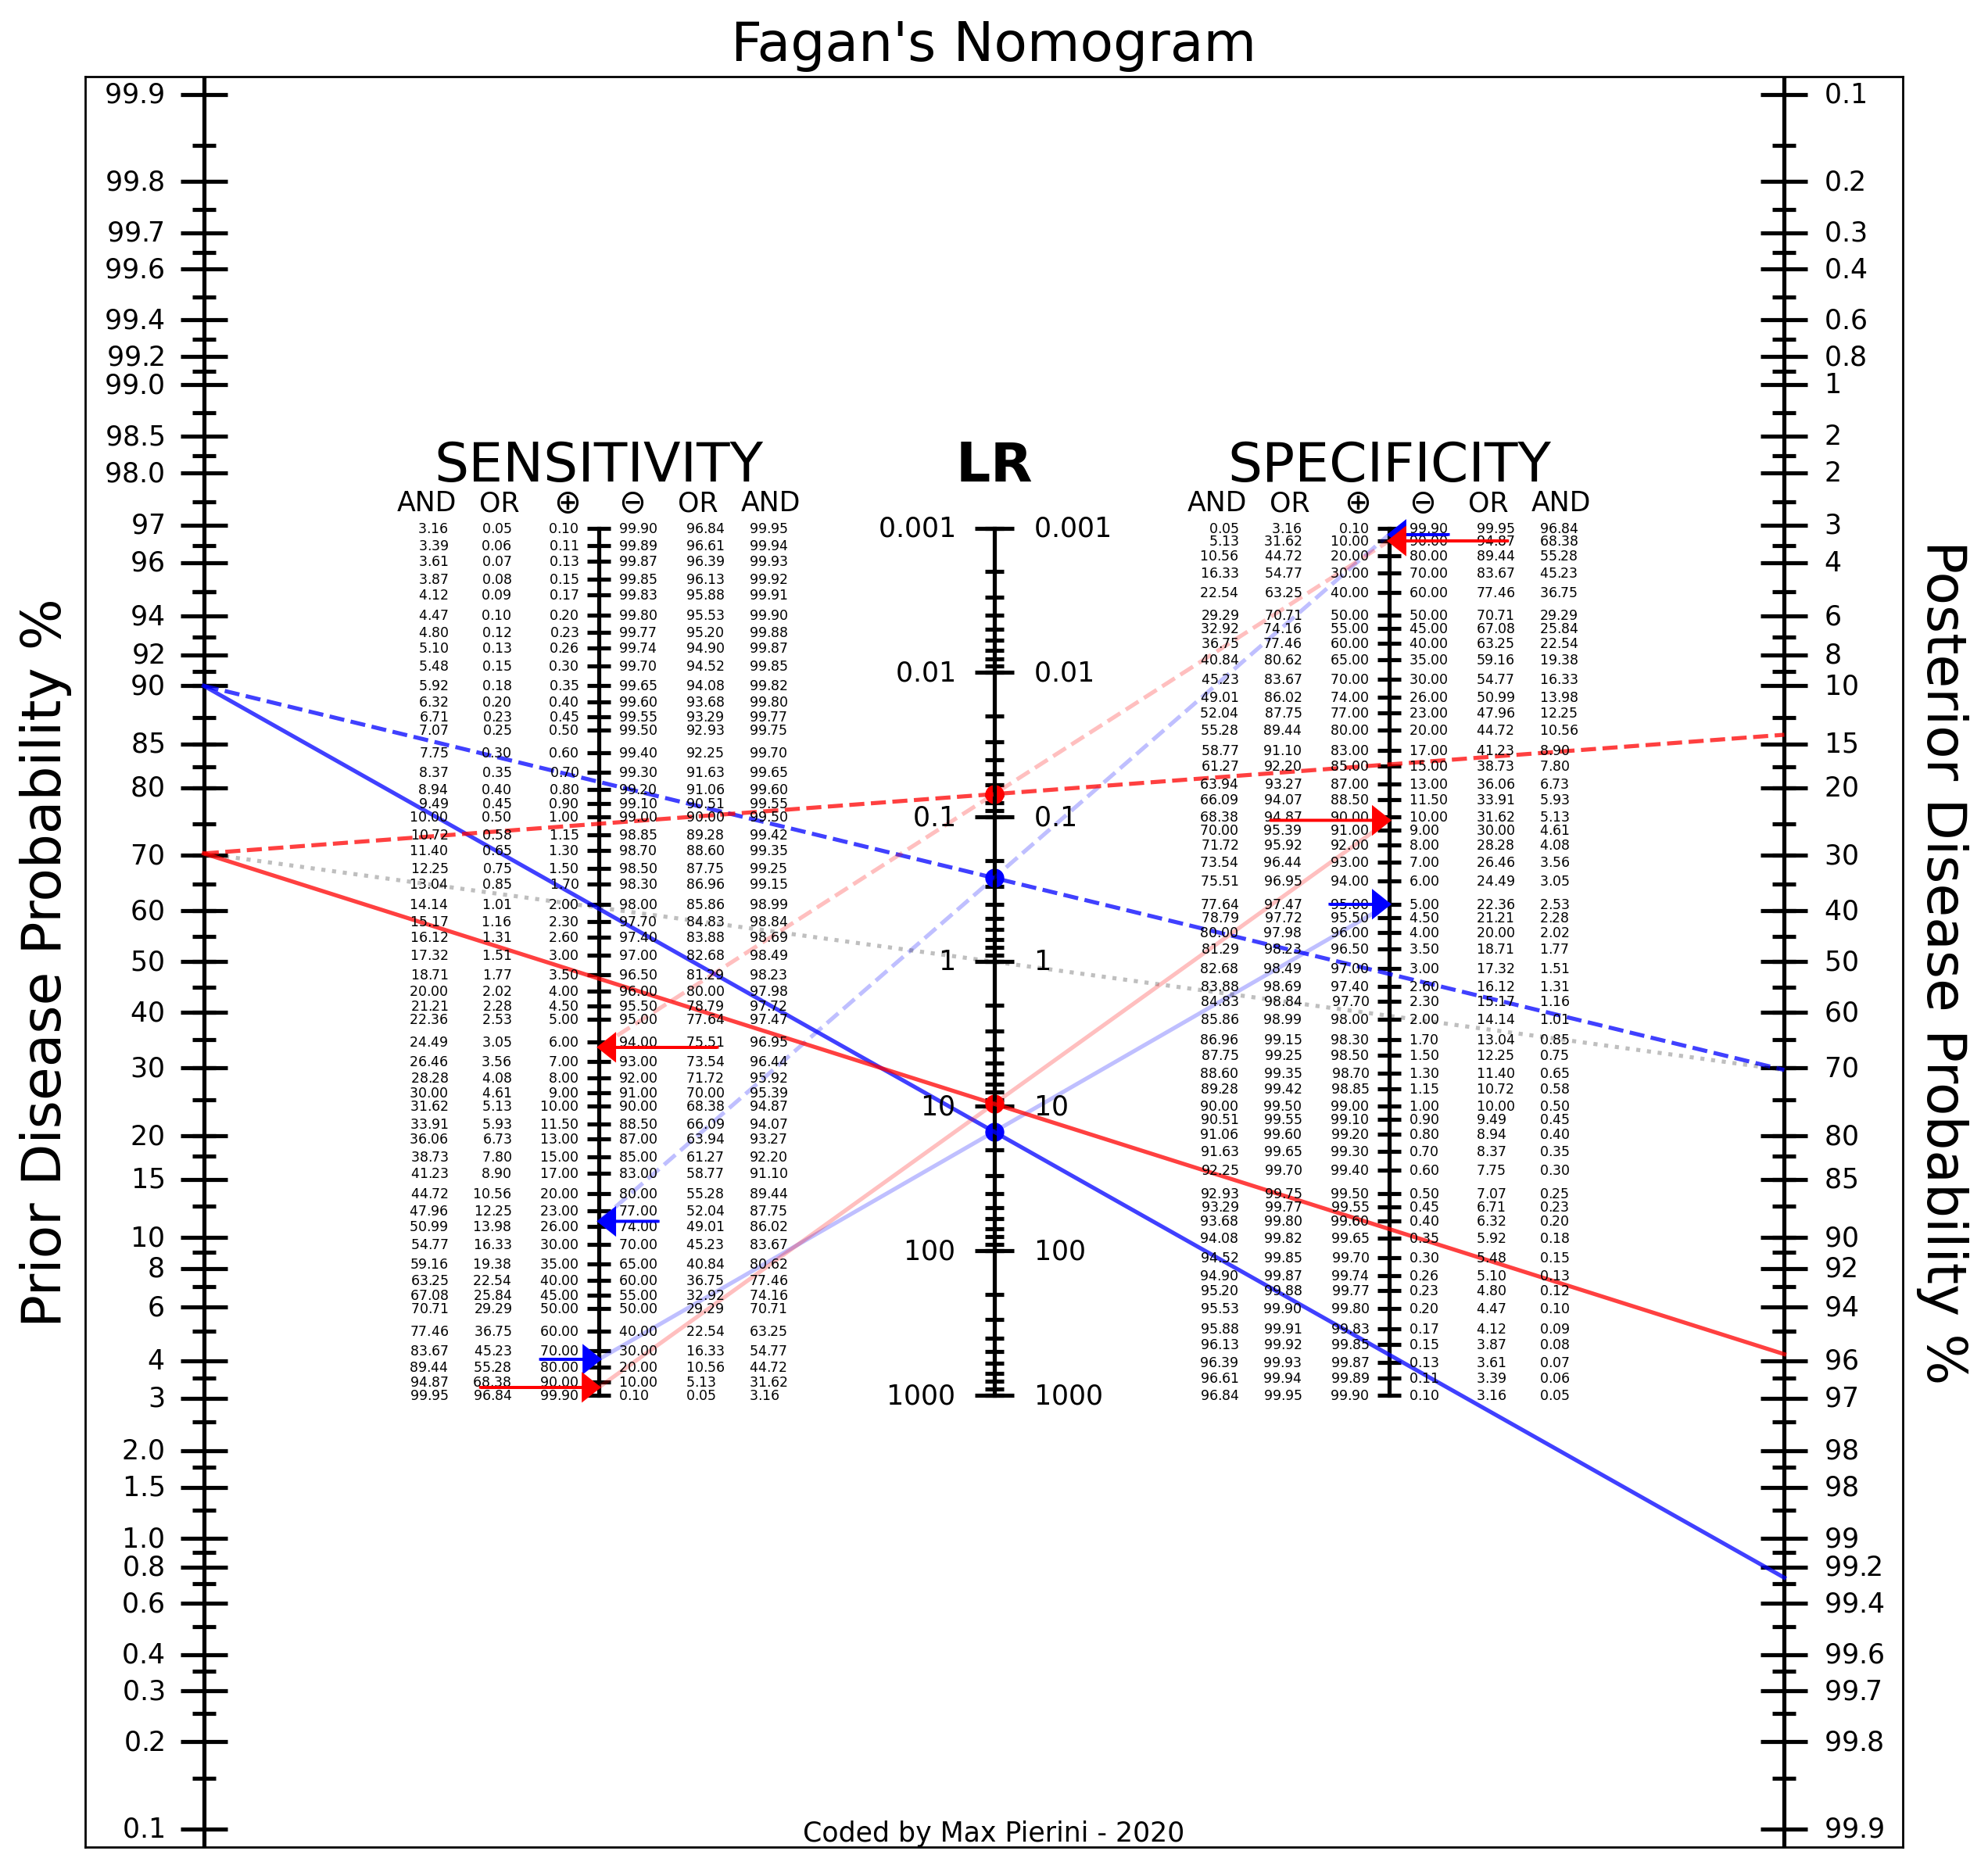

In [9]:
Fagan2(data=[PR, SE, SP], post=True, plotrule=True, rule="OR", postrule=True)